In [58]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)

In [59]:
set.seed(9999) # set a seed to be consistent

heart_data <- read_excel("data/heart_disease.xlsx") |>
                        mutate(ca = as.numeric(ca), thal = as.numeric(thal), num = as.factor(num)) |>
                        na.omit()
                    

# Split data (training 70% test 30%)
heart_split <- initial_split(heart_data, prop = 0.70, strata = num)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

# Cross-Validation
heart_vfold <- vfold_cv(heart_train, v = 5, strata = num)
heart_train

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
48,0,3,130,275,0,0,139,0,0.2,1,0,3,0
49,1,2,130,266,0,0,171,0,0.6,1,0,3,0
64,1,1,110,211,0,2,144,1,1.8,2,0,3,0
50,0,3,120,219,0,0,158,0,1.6,2,0,3,0


In [60]:
# KNN Steps
k_vals <- tibble(neighbors = c(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)) # K-Values you want to test out

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_recipe <- recipe(num ~ . , data = heart_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())


heart_fit <- workflow() |>
                     add_recipe(heart_recipe) |>
                     add_model(knn_spec) |>
                     tune_grid(resamples = heart_vfold, grid = k_vals)

heart_results <- collect_metrics(heart_fit)

accuracies <- heart_results |>
              filter(.metric == "accuracy")
accuracies

→ A | warning: No observations were detected in `truth` for level(s): '63'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x4

There were issues with some computations   A: x5





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.5296512,5,0.02397859,Preprocessor1_Model01
3,accuracy,multiclass,0.5639535,5,0.01845965,Preprocessor1_Model02
4,accuracy,multiclass,0.5593023,5,0.01770346,Preprocessor1_Model03
5,accuracy,multiclass,0.5739535,5,0.02309201,Preprocessor1_Model04
6,accuracy,multiclass,0.5832558,5,0.01489031,Preprocessor1_Model05
7,accuracy,multiclass,0.5875581,5,0.02400860,Preprocessor1_Model06
8,accuracy,multiclass,0.5925581,5,0.01730899,Preprocessor1_Model07
9,accuracy,multiclass,0.5979070,5,0.01998732,Preprocessor1_Model08
10,accuracy,multiclass,0.6072093,5,0.01326881,Preprocessor1_Model09


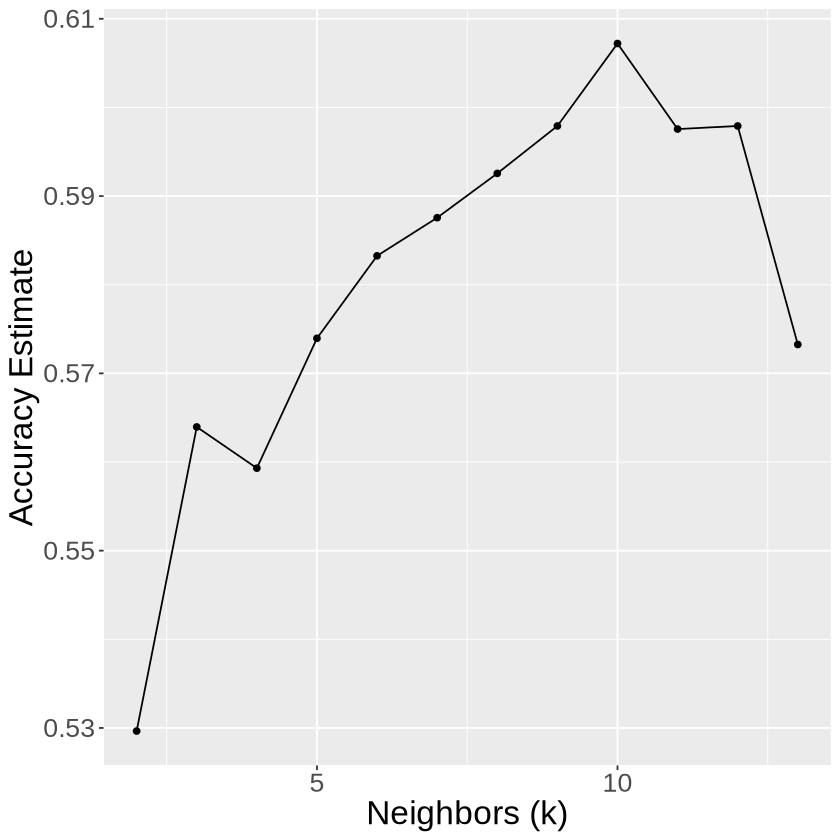

In [61]:
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors (k)", y = "Accuracy Estimate") +
       theme(text = element_text(size = 20)) 
       # scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       # scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot
# K = 10 is the best K - value

In [62]:
# Build model specifications with the best k value
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
                  set_engine("kknn") |>
                  set_mode("classification")

final_fit <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(knn_spec_final) |>
            fit(data = heart_test)
final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4615385
Best kernel: rectangular
Best k: 10

In [63]:
heart_predictions <- predict(final_fit, heart_test) |>
                     bind_cols(heart_test)
heart_predictions
# heart_metrics <- mnist_predictions |>
#                  metrics(truth = num, estimate = .pred_class)
# mnist_conf_mat <- mnist_predictions |>
#                  conf_mat(truth = nu, estimate = .pred_class)


.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3,63,63,63,63,63,63,63,63,63,63.0,63,63,63,63
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
1,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
0,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
0,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
0,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
0,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
0,57,1,3,150,168,0,0,174,0,1.6,1,0,3,0
0,54,1,4,140,239,0,0,160,0,1.2,1,0,3,0
